In [1]:
import dwong
electron = "/Users/wongdowling/Desktop/n-tuples/5_80_training/electron_520_p580.root"

In [17]:
dq_events = dwong.getData(electron, "Events")
dq_st23 = dq_events["st23"]
(x, y, eng, labels, labels_decrease, seeds, seed_labels) = dwong.multi_clusters(dq_events)#here performed clustering
trkls_coord = dwong.np.stack((dq_st23["x"], dq_st23["y"], dq_st23["z"], dq_st23["px"], dq_st23["py"], dq_st23["pz"]), axis=1)
dist=[]
for i in range(len(eng)):
    label=seed_labels[i][0]
    seed=seeds[i][label]
    if(len(trkls_coord[i][0]))==1:
        trkl = trkls_coord[i]  # Assuming the tracklet data is in the first row

        # Calculate the absolute difference in x and y coordinates separately
        dist_x = abs(seed[0] - trkl[0][0])  # Assuming the first element is x
        dist_y = abs(seed[1] - trkl[1][0])  # Assuming the second element is y

        dist.append((dist_x, dist_y))
        

In [18]:
len(dist)

9247

In [19]:
dist[0]

(5.053459148406972, 0.7466291427612219)

In [20]:
n=0
for item in trkls_coord:
    if len(item[0])==0:
        n+=1
print(n)

337


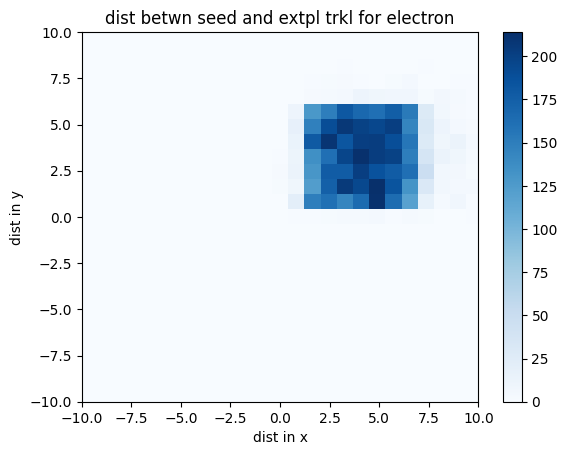

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: replace this with your array of events
events = np.array(dist)

# Extracting x and y coordinates
x_coords = events[:, 0]
y_coords = events[:, 1]

plt.hist2d(x_coords, y_coords, bins=[np.linspace(-20, 20, 50), np.linspace(-20, 20, 50)], cmap='Blues')
plt.colorbar()  # To show the color scale

# Set x and y axis limits
plt.xlim(-20, 20)
plt.ylim(-20, 20)
# Adding titles and labels (optional)
plt.title('dist betwn seed and extpl trkl for electron')
plt.xlabel('dist in x')
plt.ylabel('dist in y')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.savefig('2DHist_electron')

# Display the histogram
plt.show()
